In [1]:
from scripts.subscripts.SYNCLUS import SYNCLUS
import numpy as np

from matplotlib import rcParams

rcParams.update({
    "text.usetex": True
})

In [2]:
PTEX_dissim = np.loadtxt("./data/PTEX_DTW_matrix.dat", dtype= np.float64, delimiter = ",")

In [3]:
from scripts.ClusterMetrics import silhouette_score_precomputed, calinski_harabasz_score_precomputed, davies_bouldin_score_precomputed

def GetClusteringMetrics(dissim, Labels):
    SH_score = silhouette_score_precomputed(dissim, Labels)
    CH_score = calinski_harabasz_score_precomputed(dissim, Labels)
    DB_score = davies_bouldin_score_precomputed(dissim, Labels)

    return (SH_score, CH_score, DB_score)

In [7]:
from matplotlib.pyplot import subplots, show

def VisualizeClusterMetrics(metrics_by_num):
    Figure, Subplot = subplots(3, 1, sharex="all", figsize = (7, 7))
    Figure.suptitle("SYNCLUS metrics")

    num_clusters = tuple(metrics_by_num.keys())
    SH, CH, DB = zip(*tuple(metrics_by_num.values()))

    Subplot[0].plot(num_clusters, SH, "-o")
    Subplot[1].plot(num_clusters, CH, "-o")
    Subplot[2].plot(num_clusters, DB, "-o")

    Subplot[2].set_xlabel("No. of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [5]:
metrics_by_clusters = dict()
num_iters = 500
num_reps = 100
num_clusters = tuple(range(2, 11))

for k in num_clusters:
    SYNCLUS_VTEC = SYNCLUS(PTEX_dissim, K = k, iter = num_iters, reps = num_reps)
    Labels = SYNCLUS_VTEC.fit_predict()["end_clusters"]
    Metrics = GetClusteringMetrics(PTEX_dissim, Labels)

    metrics_by_clusters[k] = Metrics

100%|██████████| 100/100 [00:29<00:00,  3.40it/s]


Best SYNCLUS at  0 with  2  clusters
Min, Quartiles, Max
210092.43, 217237.64, 377364.56, 458893.31, 537602.94


100%|██████████| 100/100 [00:49<00:00,  2.02it/s]


Best SYNCLUS at  16 with  3  clusters
Min, Quartiles, Max
116539.84, 196839.04, 206316.57, 303515.75, 529943.06


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Best SYNCLUS at  15 with  4  clusters
Min, Quartiles, Max
103735.07, 104025.77, 162462.32, 198470.74, 455319.7


100%|██████████| 100/100 [02:03<00:00,  1.23s/it]


Best SYNCLUS at  58 with  5  clusters
Min, Quartiles, Max
93040.14, 93839.29, 103672.05, 159990.16, 284371.75


100%|██████████| 100/100 [03:03<00:00,  1.84s/it]


Best SYNCLUS at  41 with  6  clusters
Min, Quartiles, Max
83560.77, 90222.54, 90999.54, 105065.98, 238667.9


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


Best SYNCLUS at  10 with  7  clusters
Min, Quartiles, Max
78621.11, 80825.03, 89936.27, 102783.41, 225568.56


100%|██████████| 100/100 [03:33<00:00,  2.13s/it]


Best SYNCLUS at  7 with  8  clusters
Min, Quartiles, Max
76029.15, 78922.69, 84890.12, 92635.61, 194794.86


100%|██████████| 100/100 [03:52<00:00,  2.33s/it]


Best SYNCLUS at  35 with  9  clusters
Min, Quartiles, Max
70548.43, 74482.81, 78508.3, 86420.67, 167540.87


100%|██████████| 100/100 [03:37<00:00,  2.17s/it]


Best SYNCLUS at  1 with  10  clusters
Min, Quartiles, Max
67919.99, 71932.73, 75167.98, 85721.91, 147392.45


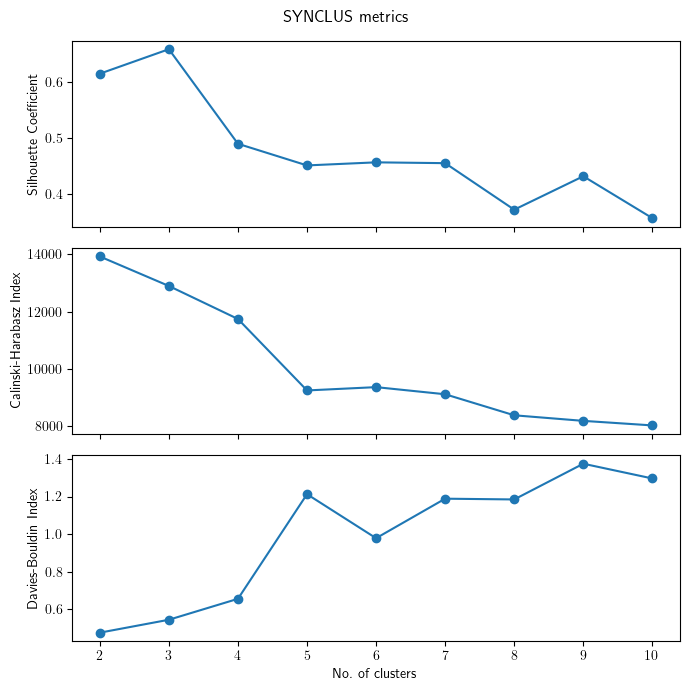

In [8]:
VisualizeClusterMetrics(metrics_by_clusters)

In [9]:
BestLabelsSYNCLUS = SYNCLUS(PTEX_dissim, K = 3, iter = num_iters, reps = num_reps).fit_predict()["end_clusters"]

np.savetxt("./data/PTEX_SYNCLUS_Labels.dat", BestLabelsSYNCLUS.reshape(BestLabelsSYNCLUS.size, 1), fmt = "%d")

100%|██████████| 100/100 [00:50<00:00,  1.97it/s]

Best SYNCLUS at  0 with  3  clusters
Min, Quartiles, Max
116539.84, 162024.98, 204150.91, 242363.17, 515642.56
